# UCI Adult Data Set

## 1. Exploration

In [1]:
import sys
print (sys.version)

import numpy as np
import pandas as pd
import keras as ke

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

sns.set()

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
data_df = pd.read_csv('data/adult-data.csv', na_values='?')
print('Data read successfully!')

Data read successfully!


In [3]:
display(data_df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
columns = list(data_df)
display(columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'country',
 'ann_salary']

In [5]:
n_people = len(data_df.index)
n_features = len(data_df.columns)-1
n_rich = len(data_df[data_df.ann_salary == '>50K'])
n_poor = len(data_df[data_df.ann_salary == '<=50K'])

n_female = len(data_df[data_df.sex == 'Female'])
n_male = len(data_df[data_df.sex == 'Male'])

print("Total number of people: {}".format(n_people))
print("Number of rich people: {}".format(n_rich))
print("Number of poor people: {}".format(n_poor))
print("Number of features: {}".format(n_features))

salary_by_sex = data_df.groupby(['sex', 'ann_salary']).count()['age']
display(salary_by_sex)

salary_by_race = data_df.groupby(['race', 'ann_salary']).count()['age']
display(salary_by_race)

Total number of people: 32561
Number of rich people: 7841
Number of poor people: 24720
Number of features: 14


sex     ann_salary
Female  <=50K          9592
        >50K           1179
Male    <=50K         15128
        >50K           6662
Name: age, dtype: int64

race                ann_salary
Amer-Indian-Eskimo  <=50K           275
                    >50K             36
Asian-Pac-Islander  <=50K           763
                    >50K            276
Black               <=50K          2737
                    >50K            387
Other               <=50K           246
                    >50K             25
White               <=50K         20699
                    >50K           7117
Name: age, dtype: int64

In [ ]:

for col in columns:
    

In [6]:
print("Probability of being highly paid given Female = ", salary_by_sex['Female', '>50K']/(salary_by_sex['Female', '<=50K']+salary_by_sex['Female', '>50K']))
print("Probability of being highly paid given Male = ", salary_by_sex['Male', '>50K']/(salary_by_sex['Male', '<=50K']+salary_by_sex['Male', '>50K']))

Probability of being highly paid given Female =  0.10946058861758426
Probability of being highly paid given Male =  0.3057365764111978


## 2. Preparing the Data

There are several non-numeric columns that need to be converted. Many of them are can be reasonably converted into `1`/`0` (binary) values.

Other columns are categorical variables with more than two values. We create as many columns as possible values and assign a `1` to one of them and `0` to all others. We  use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function for this transformation.

In [10]:
# Preprocess feature columns

def preprocess_data(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty
    # Check each column
    for col, col_data in X.iteritems():
        # If non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
        outX = outX.join(col_data)  # collect column(s) in output dataframe
    return outX.fillna('Unknown')

data_df = preprocess_data(data_df)

display(data_df.head())
display(list(data_df))
display(data_df.sum()[:60])
display(data_df.sum()[60:])

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,...,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,ann_salary_<=50K,ann_salary_>50K
0,39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,1,0,0,1,0
1,50,0,0,0,0,0,1,0,0,83311,...,0,0,0,0,0,1,0,0,1,0
2,38,0,0,0,1,0,0,0,0,215646,...,0,0,0,0,0,1,0,0,1,0
3,53,0,0,0,1,0,0,0,0,234721,...,0,0,0,0,0,1,0,0,1,0
4,28,0,0,0,1,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,1,0


['age',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'fnlwgt',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'education_num',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handl

age                                      1256257
workclass_Federal-gov                        960
workclass_Local-gov                         2093
workclass_Never-worked                         7
workclass_Private                          22696
workclass_Self-emp-inc                      1116
workclass_Self-emp-not-inc                  2541
workclass_State-gov                         1298
workclass_Without-pay                         14
fnlwgt                                6179373392
education_10th                               933
education_11th                              1175
education_12th                               433
education_1st-4th                            168
education_5th-6th                            333
education_7th-8th                            646
education_9th                                514
education_Assoc-acdm                        1067
education_Assoc-voc                         1382
education_Bachelors                         5355
education_Doctorate 

marital_status_Married-civ-spouse          14976
marital_status_Married-spouse-absent         418
marital_status_Never-married               10683
marital_status_Separated                    1025
marital_status_Widowed                       993
occupation_Adm-clerical                     3770
occupation_Armed-Forces                        9
occupation_Craft-repair                     4099
occupation_Exec-managerial                  4066
occupation_Farming-fishing                   994
occupation_Handlers-cleaners                1370
occupation_Machine-op-inspct                2002
occupation_Other-service                    3295
occupation_Priv-house-serv                   149
occupation_Prof-specialty                   4140
occupation_Protective-serv                   649
occupation_Sales                            3650
occupation_Tech-support                      928
occupation_Transport-moving                 1597
relationship_Husband                       13193
relationship_Not-in-

### 2.1 Removing redundant data columns

Remove redundant data columns of our choice
- We note that preprocessing the non-numeric (categorical) data columns into binary data columns has resulted in a number of redundant data columns which are entirely dependent on other columns
- This means that 9 of the 107 columns can be deleted without any loss of data
- For the non-numeric binary columns we can remove any one of the two binary columns created
- For the multiclass columns, we remove the binary column which is least popular

In [11]:
# Remove redundant data columns:
# 1. For the non-numeric binary columns we can remove any one of the two binary columns created

del data_df['sex_Female']
del data_df['ann_salary_<=50K']

# Remove redundant data columns:
# 2. For the multiclass columns, we remove the binary column which is least popular

del data_df['workclass_Never-worked']
del data_df['education_Preschool']
del data_df['marital_status_Married-AF-spouse']
del data_df['occupation_Armed-Forces']
del data_df['relationship_Other-relative']
del data_df['race_Other']
del data_df['country_South'] # Not least popular but not a country!

sex_Male                             1.000000
relationship_Husband                 0.580135
marital_status_Married-civ-spouse    0.431805
relationship_Unmarried               0.321273
relationship_Wife                    0.319311
occupation_Adm-clerical              0.263148
hours_per_week                       0.229309
marital_status_Divorced              0.228621
occupation_Craft-repair              0.223128
ann_salary_>50K                      0.215980
marital_status_Widowed               0.188487
marital_status_Never-married         0.171434
relationship_Not-in-family           0.168879
occupation_Other-service             0.153677
occupation_Transport-moving          0.132468
race_Black                           0.115604
marital_status_Separated             0.109135
workclass_Self-emp-not-inc           0.107451
race_White                           0.103486
relationship_Own-child               0.102369
occupation_Farming-fishing           0.100097
occupation_Handlers-cleaners      

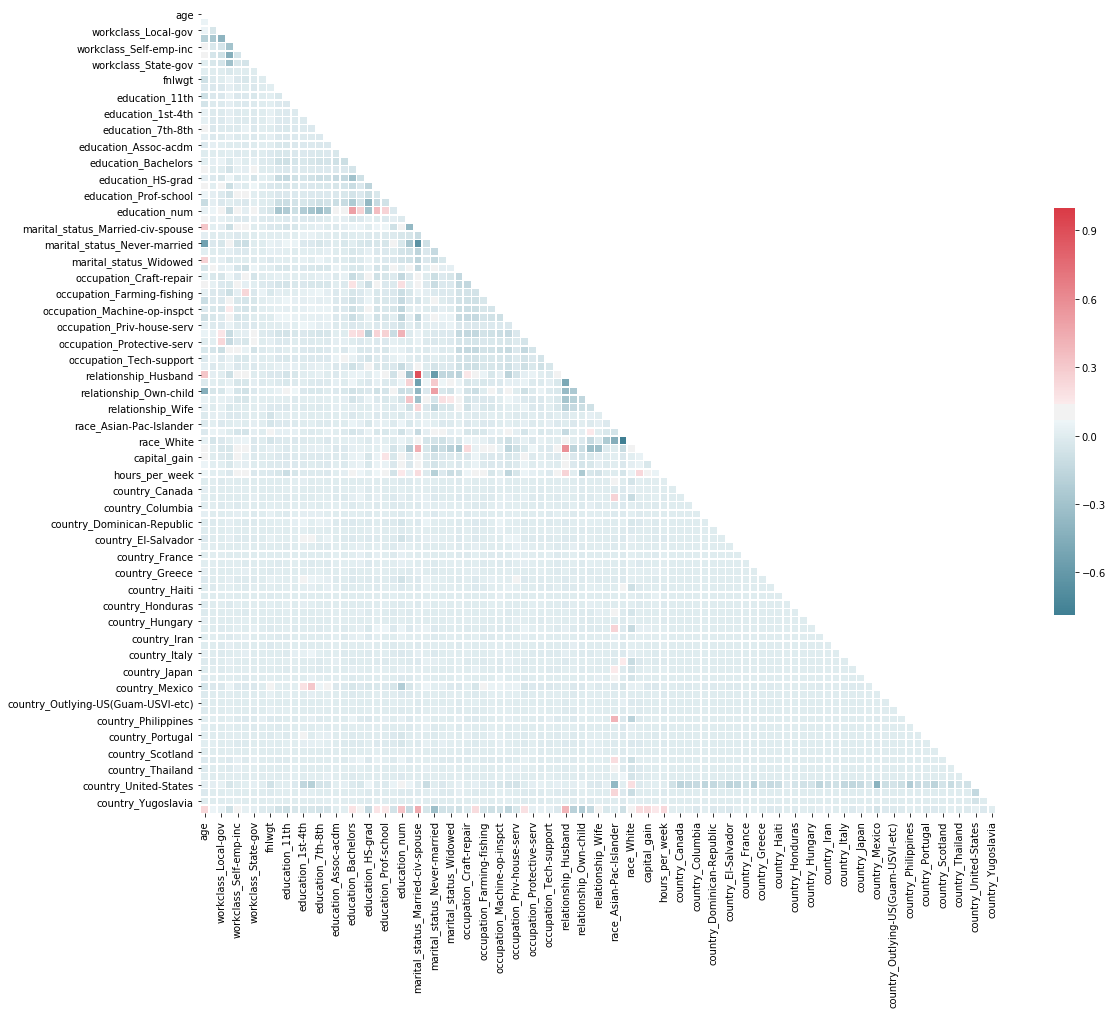

In [12]:
#Look at the correlation in the data

corr_df = data_df.corr()

sex_corrs = corr_df.loc['sex_Male'].abs().sort_values(ascending=False)
display(sex_corrs.iloc[:28])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
savefig('figures/CorrelationHeatMap.pdf')

### 2.2 Separate features and labels

In [39]:
# Extract feature (X) and target (y) columns

feature_cols = list(data_df.columns[:-1])  # all columns but last are features
target_col = data_df.columns[-1]  # last column is the target/label
sex_male = data_df['sex_Male']

print("Processed feature columns (", len(feature_cols),"):")
display(feature_cols)
print("Target column: ",target_col)

X_all = data_df[feature_cols]  # feature values for all students
y_all = data_df[target_col]  # corresponding targets/labels

display(X_all.head())
display(y_all.head())

Processed feature columns ( 97 ):


['age',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'fnlwgt',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Prof-school',
 'education_Some-college',
 'education_num',
 'marital_status_Divorced',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupa

Target column:  ann_salary_>50K


,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,education_10th,...,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,1,0,0,0,0,215646,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,1,0,0,0,0,234721,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,1,0,0,0,0,338409,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: ann_salary_>50K, dtype: uint8

### 2.3 Splitting data into training and test sets

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

num_all = data_df.shape[0]  # same as len(student_data)
num_train = 30000  # about 92% of the data
num_test = num_all - num_train

test_frac = float(num_test)/float(num_all)

sss = StratifiedShuffleSplit(test_size=test_frac, random_state=0)
for train_index, test_index in sss.split(X_all, y_all):
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_train, y_test = y_all.iloc[train_index], y_all.iloc[test_index]

sss3 = StratifiedShuffleSplit(test_size=0.333333, random_state=0)
for train_index, test_index in sss3.split(X_train, y_train):
    X_train2, X_train1 = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train2, y_train1 = y_train.iloc[train_index], y_train.iloc[test_index]

scaler = StandardScaler().fit(X_train) # scale based on X_train
scale_func = lambda df, scaler: pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
X_train  = scale_func(X_train,  scaler)
X_test   = scale_func(X_test,   scaler)
X_train2 = scale_func(X_train2, scaler)
X_train1 = scale_func(X_train1, scaler)

print("Training set: {} samples".format(X_train.shape[0]))
print("Test set: {} samples".format(X_test.shape[0]))

Training set: 30000 samples
Test set: 2561 samples


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


## 3 Training a 3 layer neural network on all the data

In [27]:
results_df = pd.DataFrame(
    data = [[0.] * 3] * 12,
    index=['Training time'    ,
           'Prediction time',
           'F1 score (train)' ,
           'Precision (train)',
           'Recall (train)'   ,
           'Accuracy (train)' ,
           'ROC AUC (train)'  ,
           'F1 score (test)',
           'Precision (test)',
           'Recall (test)',
           'Accuracy (test)',
           'ROC AUC (test)'],
    columns=[10000, 20000, 30000])
display(results_df)

,10000,20000,30000
Training time,0.0,0.0,0.0
Prediction time,0.0,0.0,0.0
F1 score (train),0.0,0.0,0.0
Precision (train),0.0,0.0,0.0
Recall (train),0.0,0.0,0.0
Accuracy (train),0.0,0.0,0.0
ROC AUC (train),0.0,0.0,0.0
F1 score (test),0.0,0.0,0.0
Precision (test),0.0,0.0,0.0
Recall (test),0.0,0.0,0.0


In [28]:
import time

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Train a model
def train_classifierNN(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train.values, y_train.values, epochs=20, verbose=0)
    end = time.time()
    return end-start
    
### Predict on training set and compute F1 score
def predict_labelsNN(clf, X, y):
    start = time.time()
    y_pred = pd.Series(clf.predict(X).ravel(), index=y.index)
    end = time.time()
    return y_pred, end-start

### Train and predict using different training set sizes
def train_predictNN(clf, X_train, y_train, X_test, y_test):
    results_df.at['Training time', len(y_train)] = train_classifierNN(clf, X_train, y_train)
    y_pred, t_pred = predict_labelsNN(clf, X_train, y_train)
    results_df.at['F1 score (train)' , len(y_train)] = f1_score(y_train.values, y_pred>0.5)
    results_df.at['Precision (train)', len(y_train)] = precision_score(y_train.values, y_pred>0.5)
    results_df.at['Recall (train)'   , len(y_train)] = recall_score(y_train.values, y_pred>0.5)
    results_df.at['Accuracy (train)' , len(y_train)] = accuracy_score(y_train.values, y_pred>0.5)
    results_df.at['ROC AUC (train)'  , len(y_train)] = roc_auc_score(y_train.values, y_pred)
    y_pred, t_pred = predict_labelsNN(clf, X_test, y_test)
    results_df.at['F1 score (test)' , len(y_train)] = f1_score(y_test.values, y_pred>0.5)
    results_df.at['Precision (test)', len(y_train)] = precision_score(y_test.values, y_pred>0.5)
    results_df.at['Recall (test)'   , len(y_train)] = recall_score(y_test.values, y_pred>0.5)
    results_df.at['Accuracy (test)' , len(y_train)] = accuracy_score(y_test.values, y_pred>0.5)
    results_df.at['ROC AUC (test)'  , len(y_train)] = roc_auc_score(y_test.values, y_pred)
    results_df.at['Prediction time' , len(y_train)] = t_pred
    return y_pred

,10000,20000,30000
Training time,23.077170,40.738402,62.442701
Prediction time,0.049443,0.042038,0.042566
F1 score (train),0.728123,0.723438,0.715700
Precision (train),0.784926,0.786917,0.795262
Recall (train),0.678987,0.669435,0.650609
Accuracy (train),0.877900,0.876750,0.875533
ROC AUC (train),0.931259,0.933973,0.933307
F1 score (test),0.671782,0.678725,0.673179
Precision (test),0.708633,0.724265,0.744597
Recall (test),0.638574,0.638574,0.614263


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


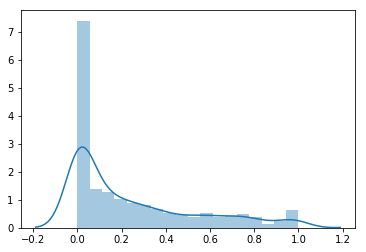

In [29]:
import keras as ke
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def nn_classifier(n_features):
    inputs = Input(shape=(n_features,))
    dense1 = Dense(32, activation='relu')(inputs)
    dropout1 = Dropout(0.2)(dense1)
    dense2 = Dense(32, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)
    dense3 = Dense(32, activation="relu")(dropout2)
    dropout3 = Dropout(0.2)(dense3)
    outputs = Dense(1, activation='sigmoid')(dropout3)
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predictNN(clf_nn, X_train1, y_train1, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train2, y_train2, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train, y_train, X_test, y_test)

display(results_df)

Text(0.5, 0, '$\\mathbb{P}(income>50K | sex)$')

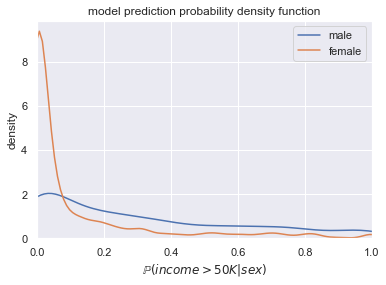

In [51]:
sns.set()
ax = sns.distplot(y_pred[sex_male==1], hist=False, label='male')
ax = sns.distplot(y_pred[sex_male==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
ax.savefig('figures/pdf-all-data.pdf')

## Training with gender mirror

In [72]:
from sklearn.utils import shuffle
def neutralise_correlation_binary(sensitive_attribute, correlated_attribute, df):
    mirror_df = df.copy()
    for i in range(df.shape[0]):
        if df.iloc[i][sensitive_attribute]:
            mirror_df.at[i, sensitive_attribute] = 0
        else:
            mirror_df.at[i, sensitive_attribute] = 1
    print(mirror_df.iloc[0][sensitive_attribute], df.iloc[0][sensitive_attribute])
    return shuffle(pd.concat([df, mirror_df]), pd.concat([y_train, y_train]))

In [8]:
X_train_mirror1 = neutralise_correlation_binary('sex_Male', 'relationship_Husband', X_train)
y_pred = train_predictNN(clf_nn, X_train_mirror1, y_train, X_test, y_test)


Female
Male


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Female,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Female,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Male,0,0,40,Cuba,<=50K


## Training without gender

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


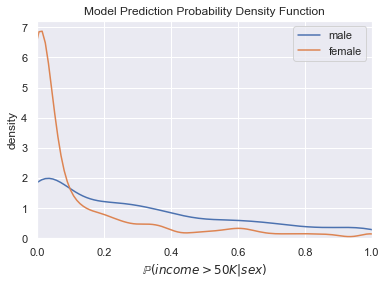

In [71]:
X_train.drop(columns='sex_Male', inplace=True)
X_test.drop(columns='sex_Male', inplace=True)
clf_nn = nn_classifier(n_features=X_train.shape[1])
y_pred = train_predictNN(clf_nn, X_train, y_train, X_test, y_test)
ax = sns.distplot(y_pred[sex_male==1], hist=False, label='male')
ax = sns.distplot(y_pred[sex_male==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
ax.figure.savefig('figures/no-sex-data.pdf')

## Mirroring the most correlated feature

We want to remove the gender information contained in relationship_Husband (the feature most correlated with sex).

In [63]:
display(sex_corrs.iloc[:28])

sex_Male                             1.000000
relationship_Husband                 0.580135
marital_status_Married-civ-spouse    0.431805
relationship_Unmarried               0.321273
relationship_Wife                    0.319311
occupation_Adm-clerical              0.263148
hours_per_week                       0.229309
marital_status_Divorced              0.228621
occupation_Craft-repair              0.223128
ann_salary_>50K                      0.215980
marital_status_Widowed               0.188487
marital_status_Never-married         0.171434
relationship_Not-in-family           0.168879
occupation_Other-service             0.153677
occupation_Transport-moving          0.132468
race_Black                           0.115604
marital_status_Separated             0.109135
workclass_Self-emp-not-inc           0.107451
race_White                           0.103486
relationship_Own-child               0.102369
occupation_Farming-fishing           0.100097
occupation_Handlers-cleaners      

In [ ]:
X_train.drop(columns='sex_Male')
X_test.drop(columns='sex_Male')

y_pred = train_predictNN(clf_nn, X_train, y_train, X_test, y_test)
ax = sns.distplot(y_pred[sex_male==1], hist=False, label='male')
ax = sns.distplot(y_pred[sex_male==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
ax.savefig('no-sex-data.pdf')